In [1]:
 #to display graphs inline of jupyter notebook

#### About Zomato
Zomato is an Indian restaurant search and discovery service founded in 2008 by Deepinder Goyal and Pankaj Chaddah. It currently operates in 24 countries. It provides information and reviews of restaurants, including images of menus where the restaurant does not have its own website and also online delivery.  


#### Data Context
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurants at different places in Bengaluru. This Zomato data aims at analyzing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost, etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food.

__Data Dictionary:__

- url - contains the url of the restaurant in the zomato website
- address - contains the address of the restaurant in Bengaluru
- name - contains the name of the restaurant
- online_order - whether online ordering is available in the restaurant or not
- book_table - table book option available or not
- rate - contains the overall rating of the restaurant out of 5
- votes - contains total number of rating for the restaurant as of the above mentioned date
- phone - contains the phone number of the restaurant
- location - contains the neighborhood in which the restaurant is located
- rest_type - restaurant type
- dish_liked - dishes people liked in the restaurant
- cuisines - food styles, separated by comma
- approx_cost(for two people) - contains the approximate cost for meal for two people
- reviews_list - list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
- menu_item - contains list of menus available in the restaurant
- listed_in(type) - type of meal
- listed_in(city) - contains the neighborhood in which the restaurant is listed

#### 0. Import the Library

In [2]:
#import numpy, pandas, matplotlib, seaborn package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

__1. Load the Data__



In [3]:
df = pd.read_csv('zomato.csv')

__2. Basic Data Understanding__ 

Let’s start with basic data understanding by checking the data types of the columns in which we are interested to work with.

In [4]:
df.shape

(51717, 17)

In [5]:
#get the datatypes of the columns
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
#count of data types
df.dtypes.value_counts()

object    16
int64      1
dtype: int64

__Q. WHat do you think about the variable types? Are they correctly presented?  
_Ans:___ I feel that there are quite a lot of variables that are not required thus making the data large and irrelevant. There are variables like rates which can have discrepancy in the way the values are presented. This may lead to incorrect data analysis. 
ALso, it would be best if we normalise the number of votes and the rating of the restaurant to remove any irregularity of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

__Q. Which variables should be changed to integer if we want to perform any business analysis on them. Look at the original csv/excel data and think analytically.  
_Ans:__ The variables "rate" and "votes" should be changed to integer to best understand the popularity of a restaurant. We can also convert "online_order" and "book_table" to integer instead of boolean and perform data analysis on the same. 

You can try to get the list of all the columns present in the dataset:

In [8]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Initially consider the `votes` column and find its basic statistical measures

In [9]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


__3. Data Cleaning & Data Manipulation__

In this section, we will discuss some of the basic data cleaning techniques like checking for duplicate values & handling missing values. Apart from data cleaning, we will also discuss some of the manipulation techniques like changing the data type of the variables, dropping unwanted variables and renaming the columns for convenience.

In [10]:
#check for any duplicate values
df.duplicated().sum()

0

There are no duplicate values present in this dataset.  
Now we will check for missing values

In [11]:
#check for missing values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

__Q. What is your observation from the missing data findings?__  
Ans: Based on the results shown above, we can see that the maximum number of missing values lies in the "dish_liked" column. There are quite a few columns which have no null values, thus making it a decent dataset to work on. However, there is a large chunk of missing values in the "rate" column which is a disadvantage as we would like to perform analysis on the ratings of all the restaurants. Thus we would have to clean and remove redundant data.

- To simplify the analysis, we will drop some of the columns that are not very useful like `url, address and phone`.

In [12]:
# drop url, address and phone column and update the data at the same time

del df['url']
del df['address']
del df['phone']

Renaming few columns for convenience

In [13]:
#Rename as per below name
#"approx_cost(for two people)" to "cost_two"
#"listed_in(type)" to "service_type"
#"listed_in(city)" to "serve_to"

df = df.rename(columns = {"approx_cost(for two people)" : "cost_two", "listed_in(type)" : "service_type", 
                   "listed_in(city)" : "serve_to"})

In [14]:
#Check again the data 
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


`rate` is read as object, but for analysis we need that to be present in numerical format.

In [15]:
#Manipulating the 'rate' column - Find its distinct/unique values
#Manipulating the 'rate' column - Find its distinct/unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df.rate = df.rate.astype('str')
#removing the "/5" in the rate column. You can take help of lamda function statement here, use replace() and strip()

df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])

In [17]:
#rate column contains 'NEW' and '-' replacing those with nan and drop those fields without any rating
# Replace "NEW" & "-" to np.nan

df['rate'].replace("NEW",np.nan,inplace = True)
df['rate'].replace("-",np.nan,inplace = True)

In [18]:
#dropping the observations where rate and cost_two is null
df['rate'].dropna(inplace=True)
df['cost_two'].dropna(inplace=True)

In [19]:
df.rate = df.rate.astype('float')

In [20]:
#online_order and book_table are given as 'Yes' and 'No'. Converting these two True and False for better manipulation.
#use .replace() method, and do not forget to update the data at the same time

df['online_order'].replace("Yes","True",inplace = True)
df['online_order'].replace("No","False",inplace = True)
df['book_table'].replace("Yes","True",inplace = True)
df['book_table'].replace("No","False",inplace = True)

In [21]:
#Find the unique values of cost_two and data type of cost_two variable
df['cost_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

To convert the variable to an integer we could simply use `astype('int')` but in this scenario, this method would not work because of the presence of a comma in between the numbers, eg. 2,500. To avoid this kind of problem, we are using `lambda` and `replace` function to replace comma (,) with nothing and then convert to integer.

In [22]:
print(df['cost_two'].dtype)

object


In [23]:
df['cost_two'] = df['cost_two'].apply(lambda x: str(x).replace(',',''))
df.head(1)
#converting the cost_two variable to int
#apply the lambda function on cost_two column and convert to int().
#remember to replace any string values present in the entries of this column before converting to numeric, you can do it in the same lambda function line
#then again check the data
df['cost_two'] = df['cost_two'].apply(lambda x: str(x).replace(',',''))
a = list(df['cost_two'])
for i in range(0, len(a)):
    if a[i] != 'nan':
        a[i] = int(a[i])
    else:
        a[i] = None
df['cost_two'] = a

__4. Visualization__  

In this section, we will analyze the data by creating multiple visualizations using seaborn and matplotlib.  
you can use `plt.rcParams['figure.figsize'] = 14,7` for fixing the figure size

In [24]:
sns.set_style('darkgrid')

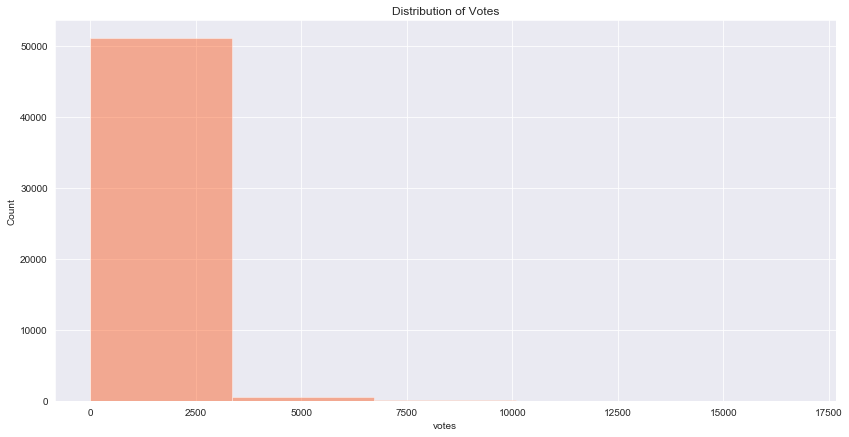

In [25]:
#lets plot the distribution of votes, Use sns.distplot()
plt.rcParams['figure.figsize'] = 14,7
sns.distplot(df['votes'],bins= 5,kde=False,color ="orangered")
plt.title("Distribution of Votes")
plt.ylabel('Count')
plt.show()

__Q. WHat does this distplot shows about the distribution of votes?  
_Ans. This distplot shows that the votes are highly skewed towards the left. The number of votes towards right most end are extremely less. The majority of the number of votes lie between 0 and 3000. 

###### a. Count Plot
Countplot is essentially the same as the barplot except that it shows the count of observations in each category bin using bars. In our dataset, let’s check the count of each rating category present.

Text(0.5, 1.0, 'Countplot of Rate Variable')

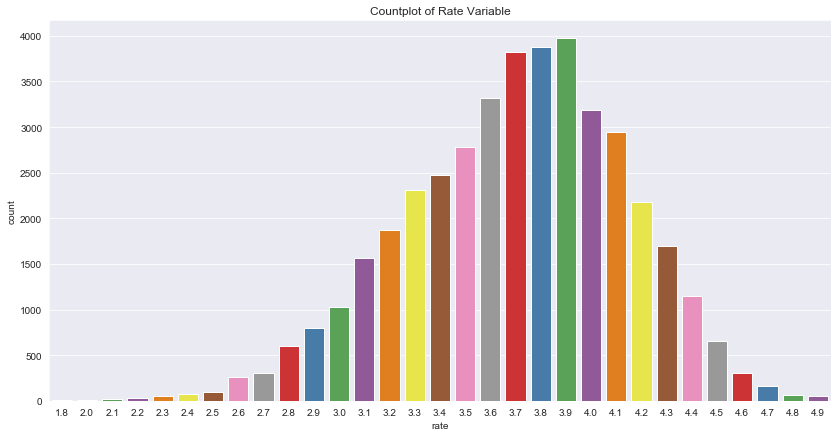

In [26]:
plt.rcParams['figure.figsize'] = 14,7
sns.countplot(df['rate'],palette="Set1")
plt.title("Countplot of Rate Variable")

__Q. WHat does this countplot shows about the distribution of `rate`? what distribution it is following , what could be mean values? what is the rating range for majority of the restaurants? Any other obseravtion?    
_Ans. The above graph tends to follow normal distribution. The mean values could be somewhere between 3.5 to 3.7 on the rate axis. Considering approximate values we can say that the mean value would be 3.6 on the rate axis and the corresponding value on the count scale would be 3250.

###### b. Joint Plot

Jointplot allows us to compare the two different variables and see if there is any relationship between these two variables. By using the Joint plot we can do both bivariate and univariate analysis by plotting the scatterplot (bivariate) and distribution plot (univariate) of two different variables in a single plotting grid.

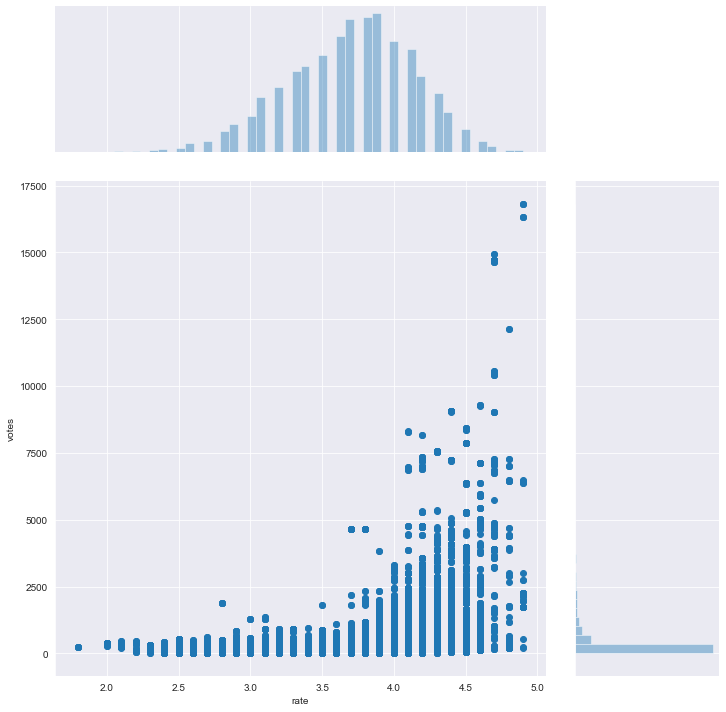

In [27]:
#joint plot for 'rate' and 'votes'. use sns.jointplot(). For displaying you csn use plt.show() also
sns.jointplot(x=df['rate'],y=df['votes'],height =10,ratio=3)

__Q. What we can infer from the above plot?__  
___Ans:___ This tells us that when the rate of a particular restaurant is less than 3, the number of votes are also very less. However in the middle range, the number of votes and the rates for each restaurant is proportional. Also when the rate of the restaurant is exteremely high, then the number of votes for the same are also pretty little. This tells us that people mostly go to those restaurants which are either highly voted or have a high rate score. 

###### c. Bar Plot

Barplot is one of the most commonly used graphic to represent the data. Barplot represents data in rectangular bars with length of the bar proportional to the value of the variable. We will analyze the variable location and see in which area most of the restaurants are located in Bangalore.

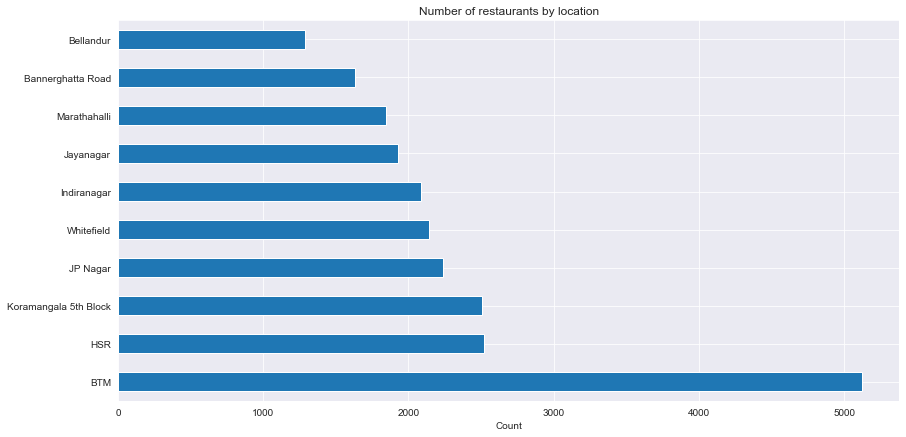

In [28]:
df.location.value_counts().nlargest(10).plot(kind = "barh")
plt.title("Number of restaurants by location")
plt.xlabel("Count")
plt.show()

__Q. What we can infer from the above plot?__  
___Ans:___ We can infer that most of the restaurants are situated in btm so this can a good area for opening a new restaurant_.

##### d. Correlation Heatmap

Correlation describes how strongly a pair of variables are related to each other.

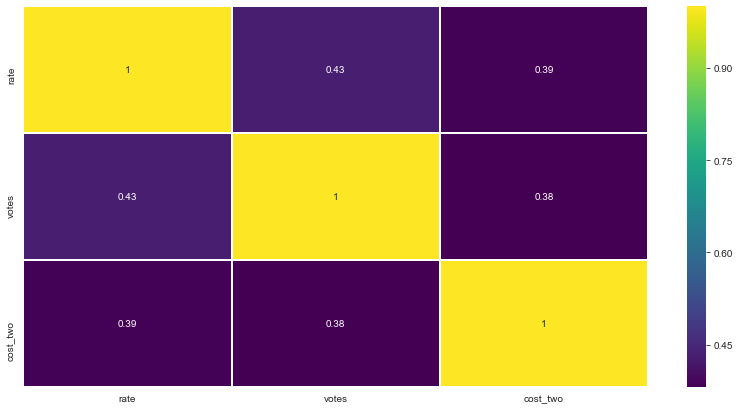

In [29]:
#seaborn heatmap function to plot the correlation grid
sns.heatmap(df.corr(), annot = True, cmap = "viridis",linecolor='white',linewidths=1)
plt.show()

The correlation function `corr` calculates the Pearson correlation between the numeric variables, it has a value between +1 and −1, where 1 is a total positive linear correlation, 0 is no linear correlation, and −1 is a total negative linear correlation.


__Q. What we can infer from the above plot?__  
___Ans:__Restaurants that provide online order have an inverse relation with the average cost for two epople in restaurant_

##### Restaurant Listed in
Lets see to in which area most of the restaurants are listed in or deliver to.

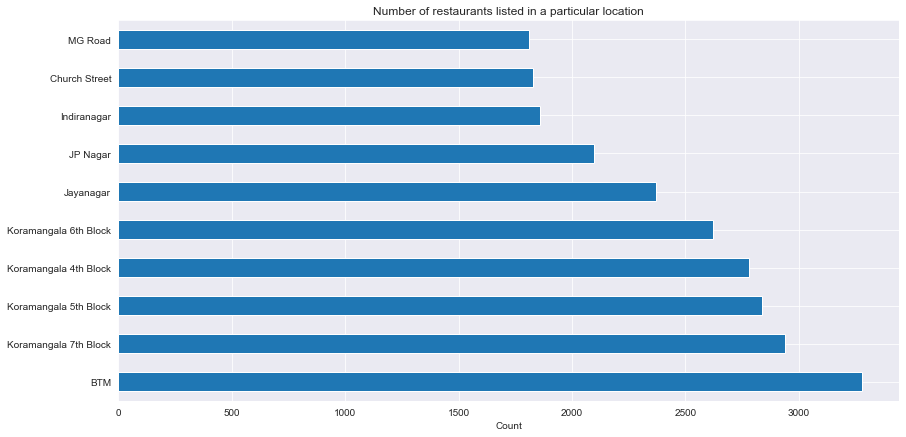

In [30]:
#restaurants serve to. use serve_to column and create frequency bar plot
#however, you can use countplot also. but, then graph will look different than below.
#Infer according to your plot
df['serve_to'].value_counts().nlargest(10).plot(kind = "barh")
plt.title("Number of restaurants listed in a particular location")
plt.xlabel("Count")
plt.show()


__Q. What we can infer from the above plot?__  
___Ans:__:maximum restaurants deliver to the btm area_. 

###### Online Order
Analyzing the restaurants based on availability of online order facility

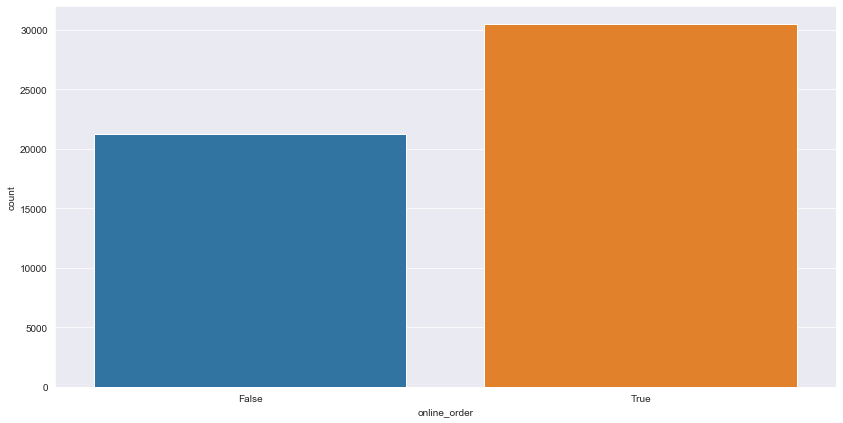

In [31]:
sns.countplot(df['online_order'],order=['False','True'])

__Q. What we can infer from the above plot?__  
___Ans:___ This tells us that the there are more restaurants that take online orders as compared to the ones who don't

*__Does online order facility impacts the rating of the restaurant?__*

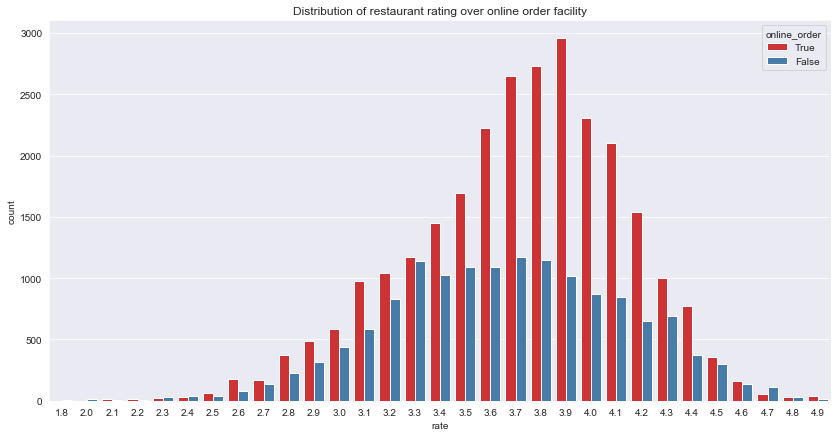

In [32]:
sns.countplot(hue = df["online_order"], palette = "Set1", x = df["rate"])
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

Restaurants which provide online order facility has better ratings than the traditional restaurants. It makes sense because many software employees stay in Bangalore and they tend to order a lot of food through the online.

##### Booking Table

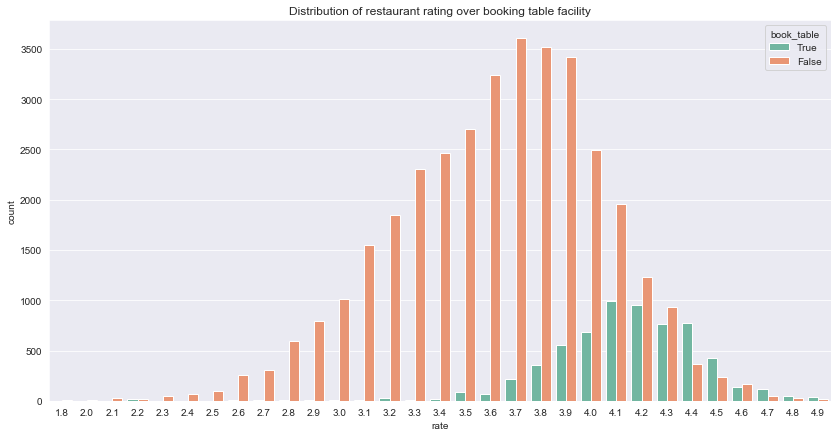

In [33]:
#rating vs booking table
sns.countplot(hue = df["book_table"], palette = "Set2", x = df["rate"])
plt.title("Distribution of restaurant rating over booking table facility")
plt.show()

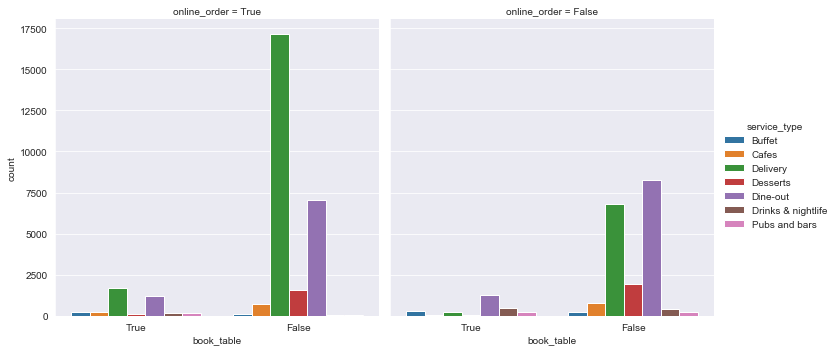

In [34]:
#Use catplot() to combine a countplot() and a FacetGrid. This allows grouping within additional categorical variables
g = sns.catplot(x="book_table", hue="service_type", col="online_order", data=df, kind="count")

- Most of the highly rated restaurants (rating more than 4.0) provide an option of booking table

##### Restaurant Service Type

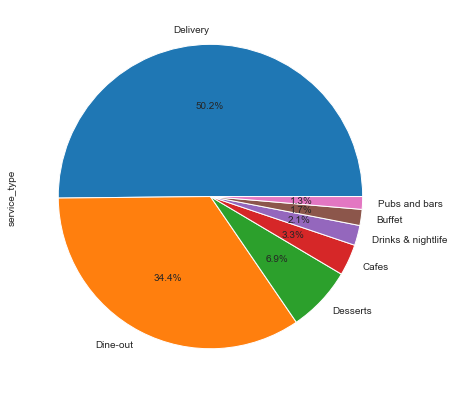

In [35]:
#check the restaurant service type

df.service_type.value_counts().plot(kind = "pie", autopct='%.1f%%')
plt.show()

- Majority of restaurants (~>50%) provides an option of home delivery.
- 35% of the restaurants listed on Zomato provides Dine out option

##### Does the service type effects ratings given to the restaurant?

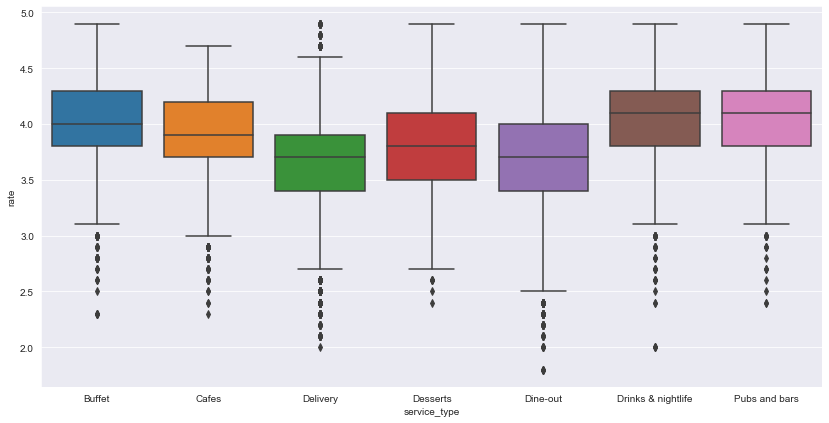

In [36]:
#ratings vs service type
sns.boxplot(x="service_type", y="rate", data = df)
plt.show()

- The Restaurants which serve drinks (pubs and bars) has median rating more than 4.5 but from the violin plot we can see that thse restaurants receive very few ratings compared to other type of restaurants

###### Biggest Restaurant Chain and Best Restaurant Chain

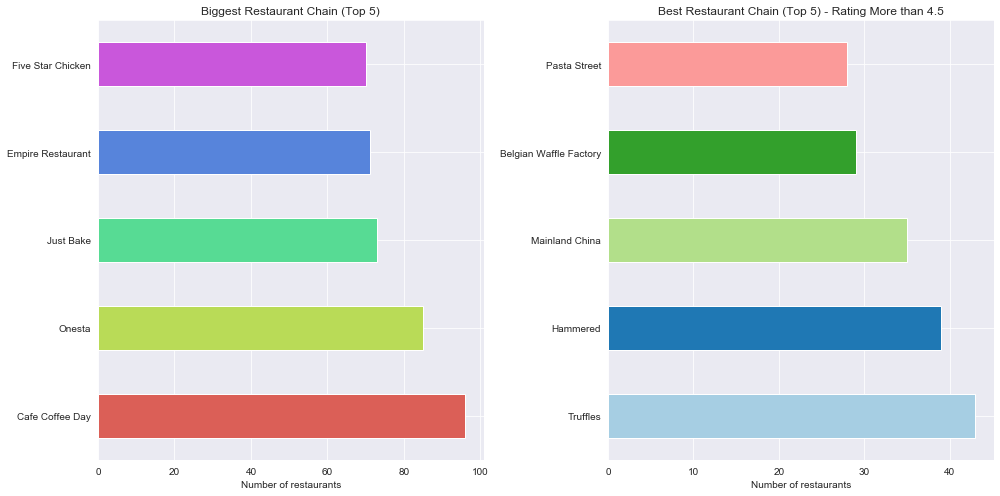

In [37]:
plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)
df.name.value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Number of restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(1,2,2)
df[df['rate']>=4.5]['name'].value_counts().nlargest(5).plot(kind = "barh", color = sns.color_palette("Paired"))
plt.xlabel("Number of restaurants")
plt.title("Best Restaurant Chain (Top 5) - Rating More than 4.5")
plt.tight_layout()

Cafe Coffee Day chain has over 90 cafes across the city that are listed in Zomato. On the other hand, Truffles – a burger chain has the best fast food restaurants (rating more than 4.5 out of 100), quality over quantity.

Next time when you visit Bangalore or if you want to check out a good restaurant over a weekend don’t forget to try the food at **Truffles**, **Hammered** and **Mainland China**.

##### Top Restaurant Type

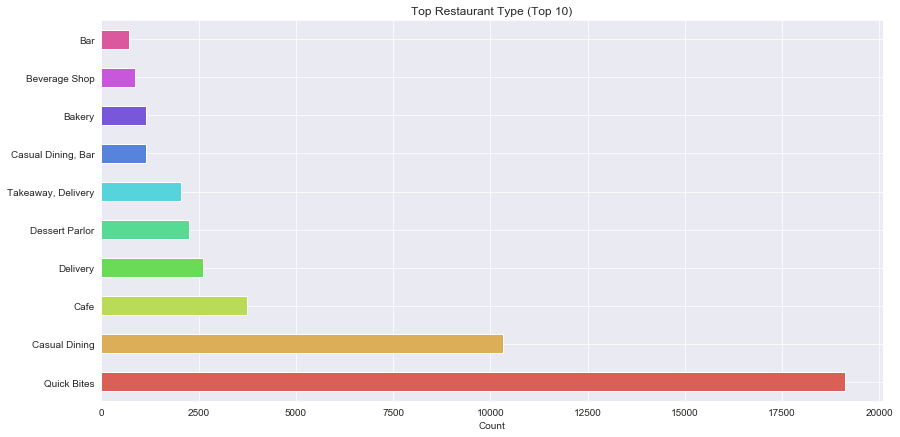

In [38]:
plt.rcParams['figure.figsize'] = 14,7
df.rest_type.value_counts().nlargest(10).plot(kind = "barh", color = sns.color_palette("hls", 10))
plt.xlabel("Count")
plt.title("Top Restaurant Type (Top 10)")
plt.show()

Hope, You have enjoyed this case study, and have learned few aspects of EDA (Exploratory Data Analysis).

___Thank You!___